# Fandango's Abnormal Ratings Project


**Our Goal is to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets based on the artical [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) with the help of pandas and visualization skills.**

---
---

**Analysis are of two parts:**

**1) Exploring Fandango Displayed Scores versus True User Ratings**

**2) Comparison of Fandango Ratings to Other Sites**

**This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data.** 

**There are two csv files:**

**1)fandango_scrape.csv contains every film rating pulled from Fandango on Aug. 24, 2015.**

**2)all_sites_scores.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score.**

---
---

In [1]:
# Importing libraries required for dealing and manipluating data
import numpy as np
import pandas as pd

In [2]:
#Importing libraries required for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.**


In [3]:
# Reading data from fandango_scrape.csv and creating data frame fandango
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
#To disply top 5 rows 
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
#To see info of the data frame fandango
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


---

**The data frame has 504 rows and there is no null values in the data frame.**

---



In [6]:
# basic statistcis
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


----


**From the above description we can observe the mean of RATING is lower than the mean of STARS**

**RATING---The actual average score the movie obtained**

**STARS----Number of stars presented on Fandango.com**


----



**Let's explore the relationship between popularity of a film and its rating.**

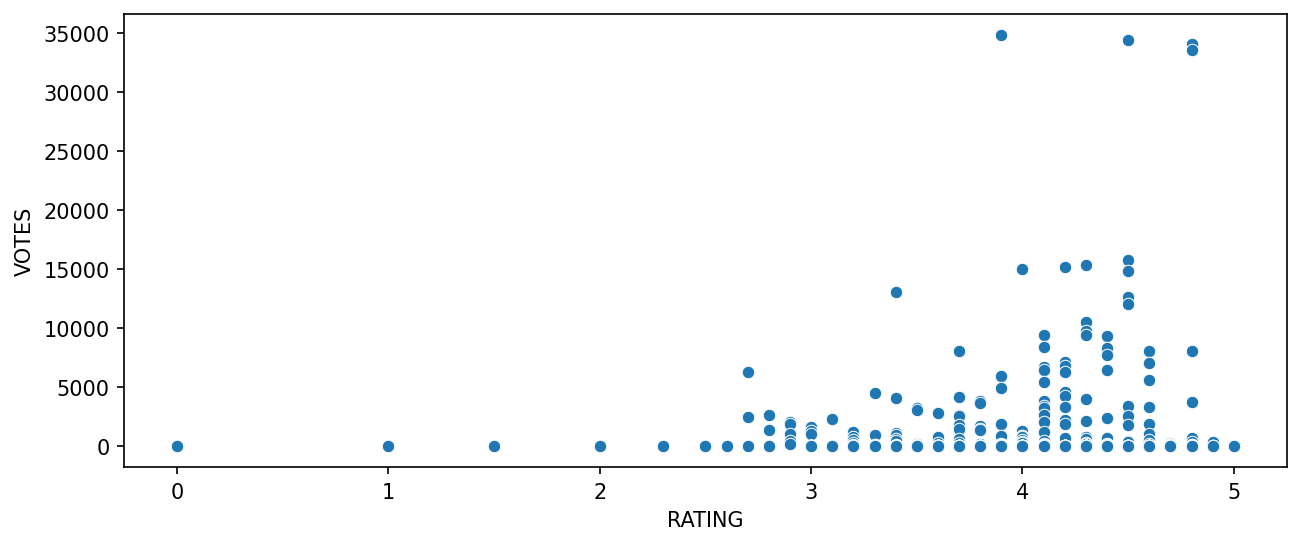

In [7]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

---

**we can clearly observe from the above plot that the movies with zero votes has rating of 5,4,3 on Fandango.**

---

In [8]:
# correlation between columns


fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


<AxesSubplot:>

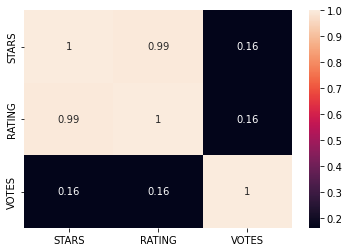

In [9]:
sns.heatmap(fandango.corr(),annot=True)

---

**From the above heatmap we can observe that the corelation between stars and rating is not perfect**

---

In [10]:
# Created a new column YEAR 

fandango['YEAR']=fandango['FILM'].apply(lambda x:x.split('(')[-1].split(')')[-2])
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [11]:

fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

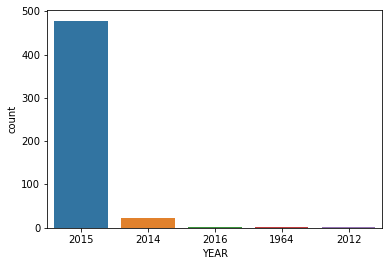

In [12]:

sns.countplot(x='YEAR',data = fandango)

---

**478 movies in 2015**

---

In [13]:
#To see top 10 movies according to votes

fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


---


**Top 10 movies according to Votes**


---

In [14]:
#Movies with zero votes

fandango[fandango['VOTES'] == 0]['FILM'].count()

69

---

**Removing films with zero votes.**

---

In [15]:
#Created a new data frame with films that have zero votes
fandango1=fandango[fandango['VOTES'] > 0]
fandango1

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**



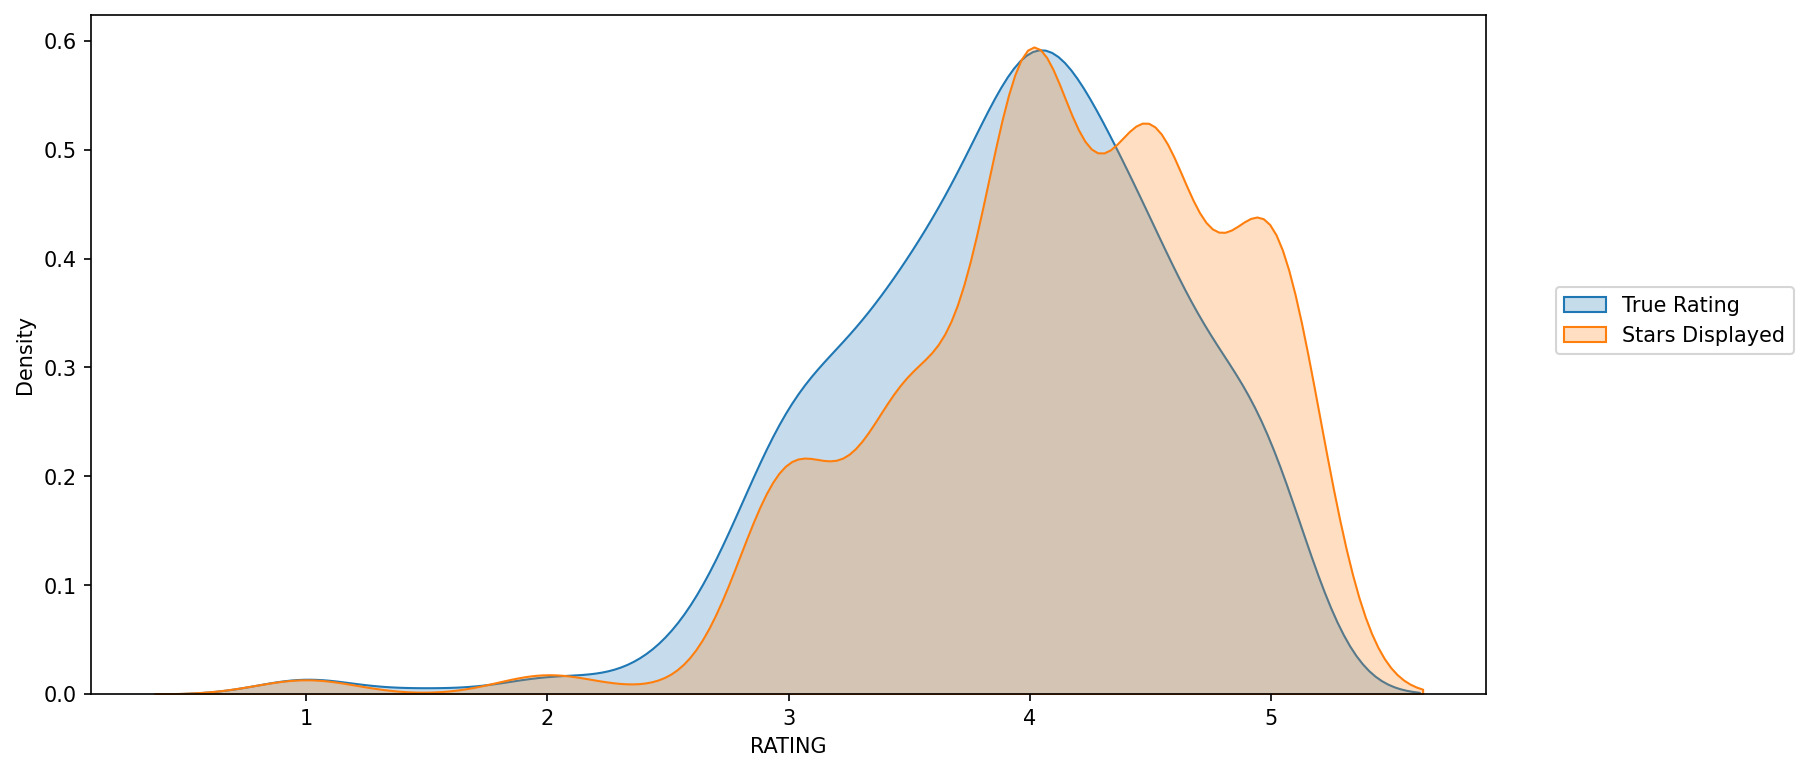

In [16]:
#displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING)


plt.figure(figsize=(12,6),dpi=150)
sns.kdeplot(data=fandango1,x='RATING',fill=True,label='True Rating')
sns.kdeplot(data=fandango1,x='STARS',fill=True,label='Stars Displayed')
plt.legend(loc=(1.05,0.5))

---

**As you can see for any movie with rating less than approxmately 4 there are more stars displayed than the true rating.**

---

In [17]:
#Create a new column of the different between STARS displayed versus true RATING

fandango1['STARS_DIFF']=fandango1['STARS']-fandango1['RATING']
fandango1['STARS_DIFF'] = fandango1['STARS_DIFF'].round(2)
fandango1

C:\Users\HP\AppData\Local\Temp/ipykernel_6808/3900970499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango1['STARS_DIFF']=fandango1['STARS']-fandango1['RATING']
C:\Users\HP\AppData\Local\Temp/ipykernel_6808/3900970499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango1['STARS_DIFF'] = fandango1['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

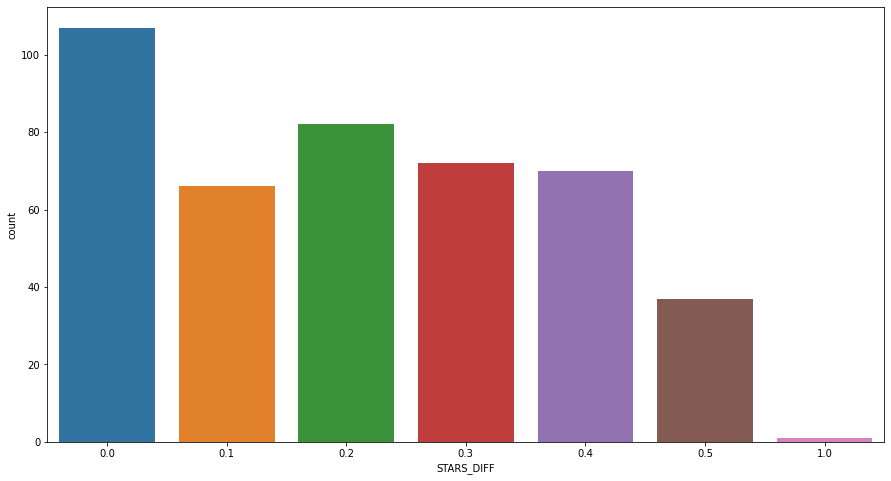

In [18]:
#displaying the number of times a certain difference occurs


plt.figure(figsize=(15,8))

sns.countplot(x='STARS_DIFF',data=fandango1)



**We can see from the plot that one movie was displaying over a 1 star difference than its true rating!**

---

In [19]:
#TO see from the plot that one movie was displaying over a 1 star difference.


fandango1[fandango1['STARS_DIFF']>=1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0





## Comparison of Fandango Ratings to Other Sites



In [20]:
#Reading the data from other sites


all_sites = pd.read_csv("all_sites_scores.csv")

In [21]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [22]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [23]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

**Rotten Tomatoes has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.** 




(0.0, 100.0)

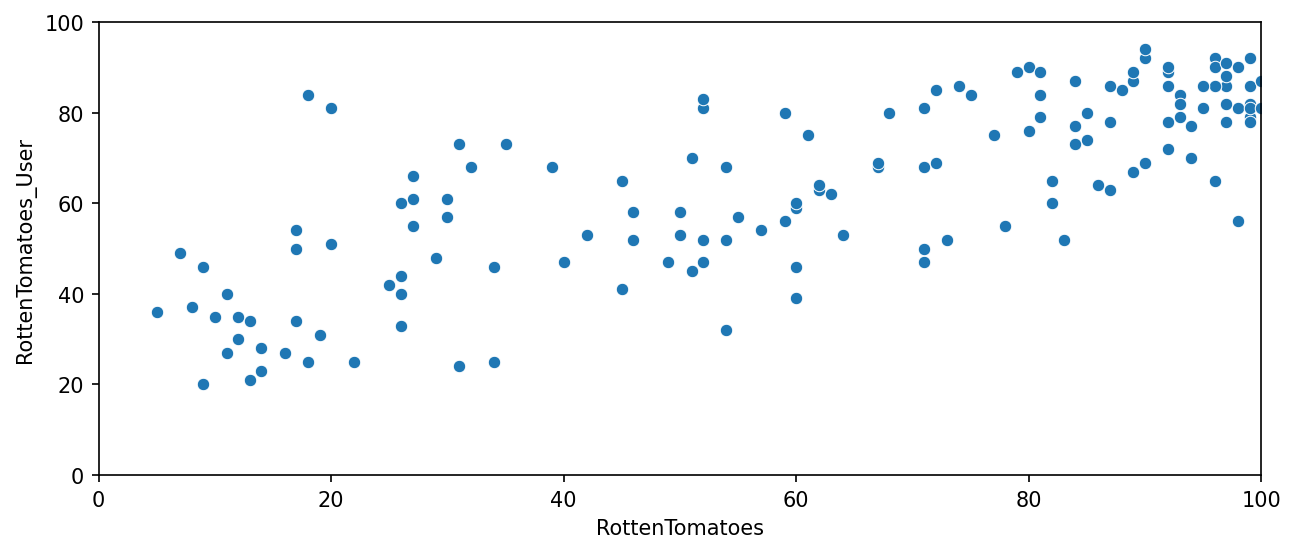

In [24]:
# the relationship between RT Critic reviews and RT User reviews
#RT  = Rotten Tomatoes

plt.figure(figsize=(10,4),dpi = 150)

 
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data = all_sites)
plt.ylim(0,100)
plt.xlim(0,100)


---

**Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.**

---

In [25]:
#Created a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']


---

**Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.**

**Mean Absolute Difference between RT scores and RT User scores as described above.**

In [26]:

all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Text(0.5, 1.0, 'The differences between RT Critics Score and RT User Score ')

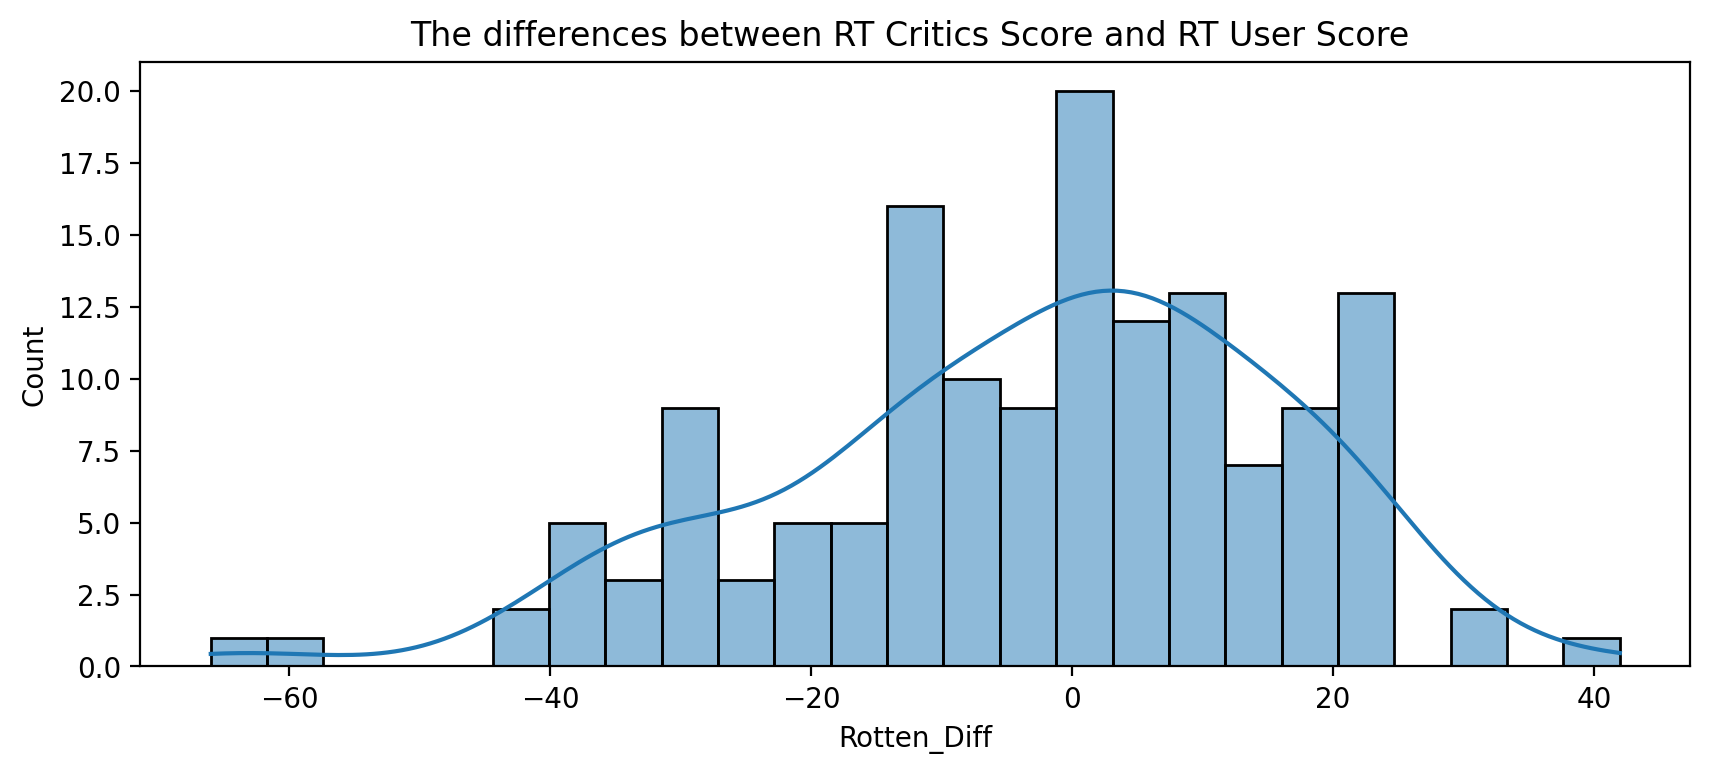

In [27]:
#The differences between RT Critics Score and RT User Score 

plt.figure(figsize=(10,4),dpi=200)

sns.histplot(x='Rotten_Diff',data = all_sites,bins=25,kde=True)
plt.title('The differences between RT Critics Score and RT User Score ')

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

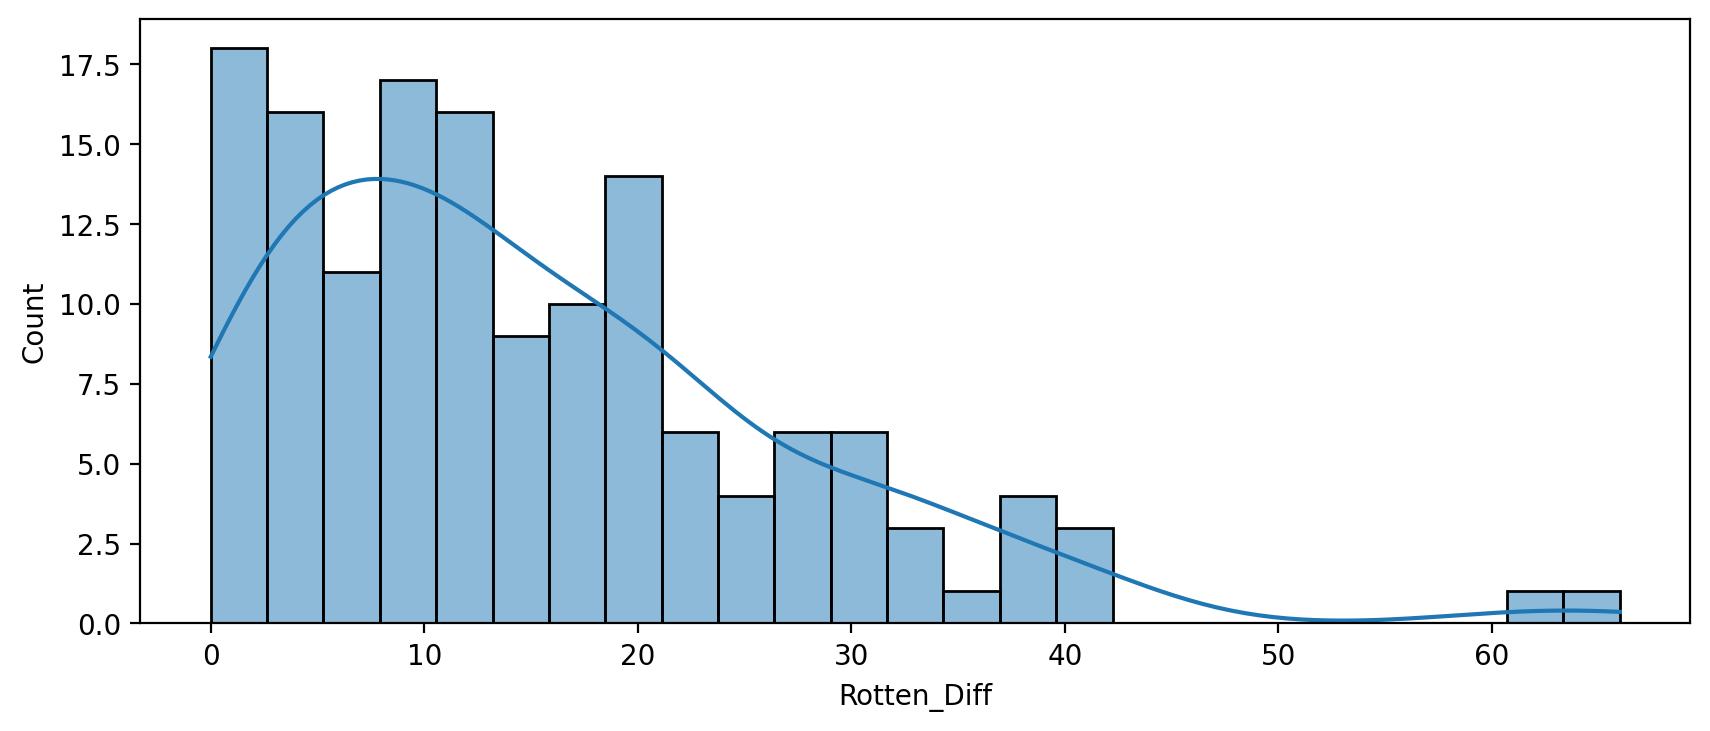

In [28]:
# distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.

plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),kde = True,bins = 25)

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

In [29]:
#top 5 movies users rated higher than critics on average

all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Users Love but Critics Hat**

---

In [30]:
#top 5 movies critics scores higher than users on average

all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


**Critics love, but Users Hate**

----

## MetaCritic

**Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.**

(0.0, 10.0)

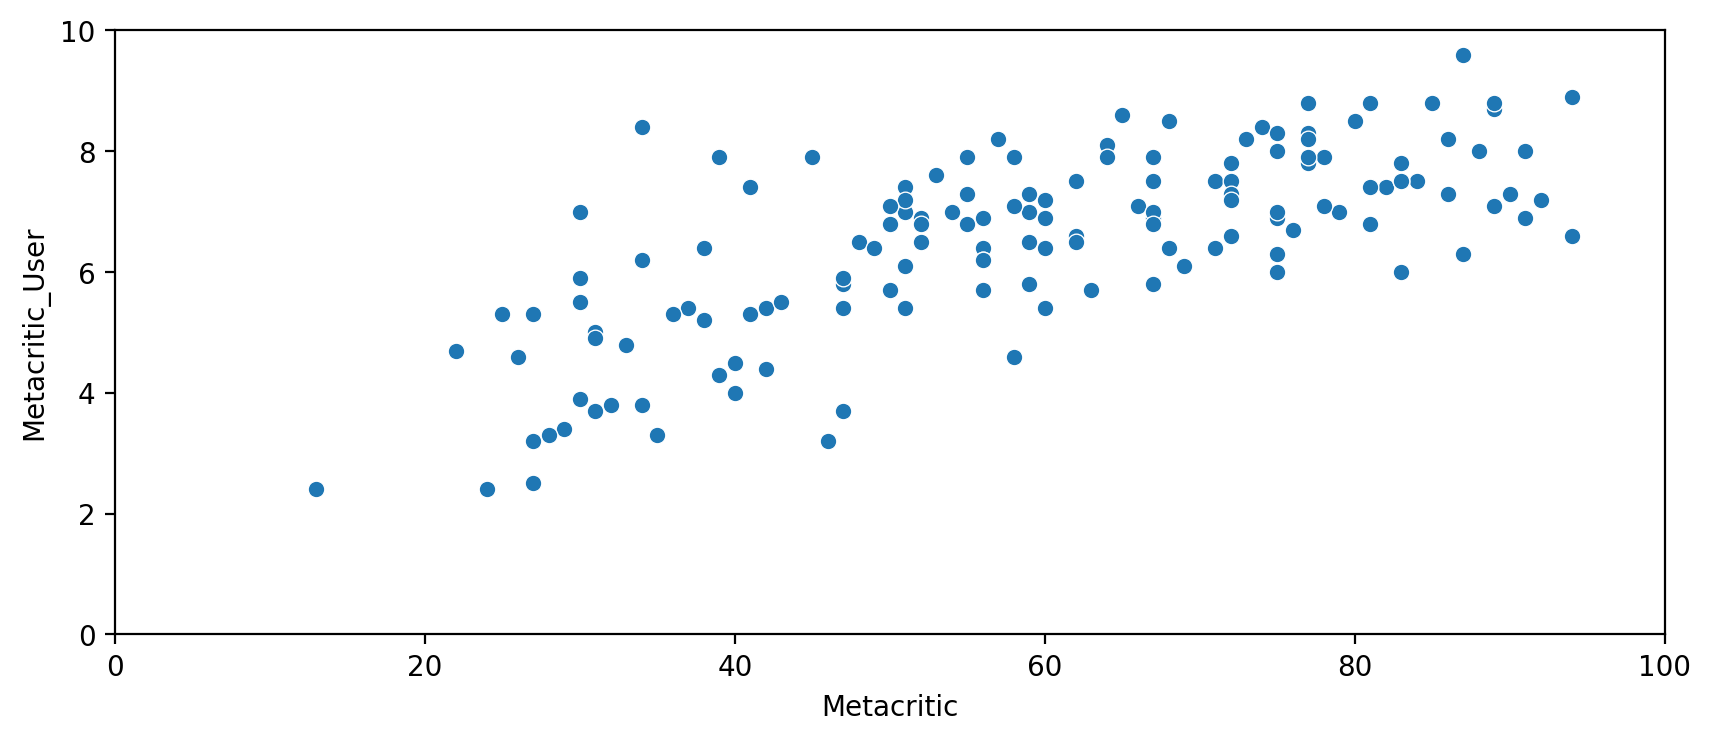

In [31]:
#scatterplot of the Metacritic Rating versus the Metacritic User rating


plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='Metacritic',y='Metacritic_User',data = all_sites )
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

**Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.**



In [32]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

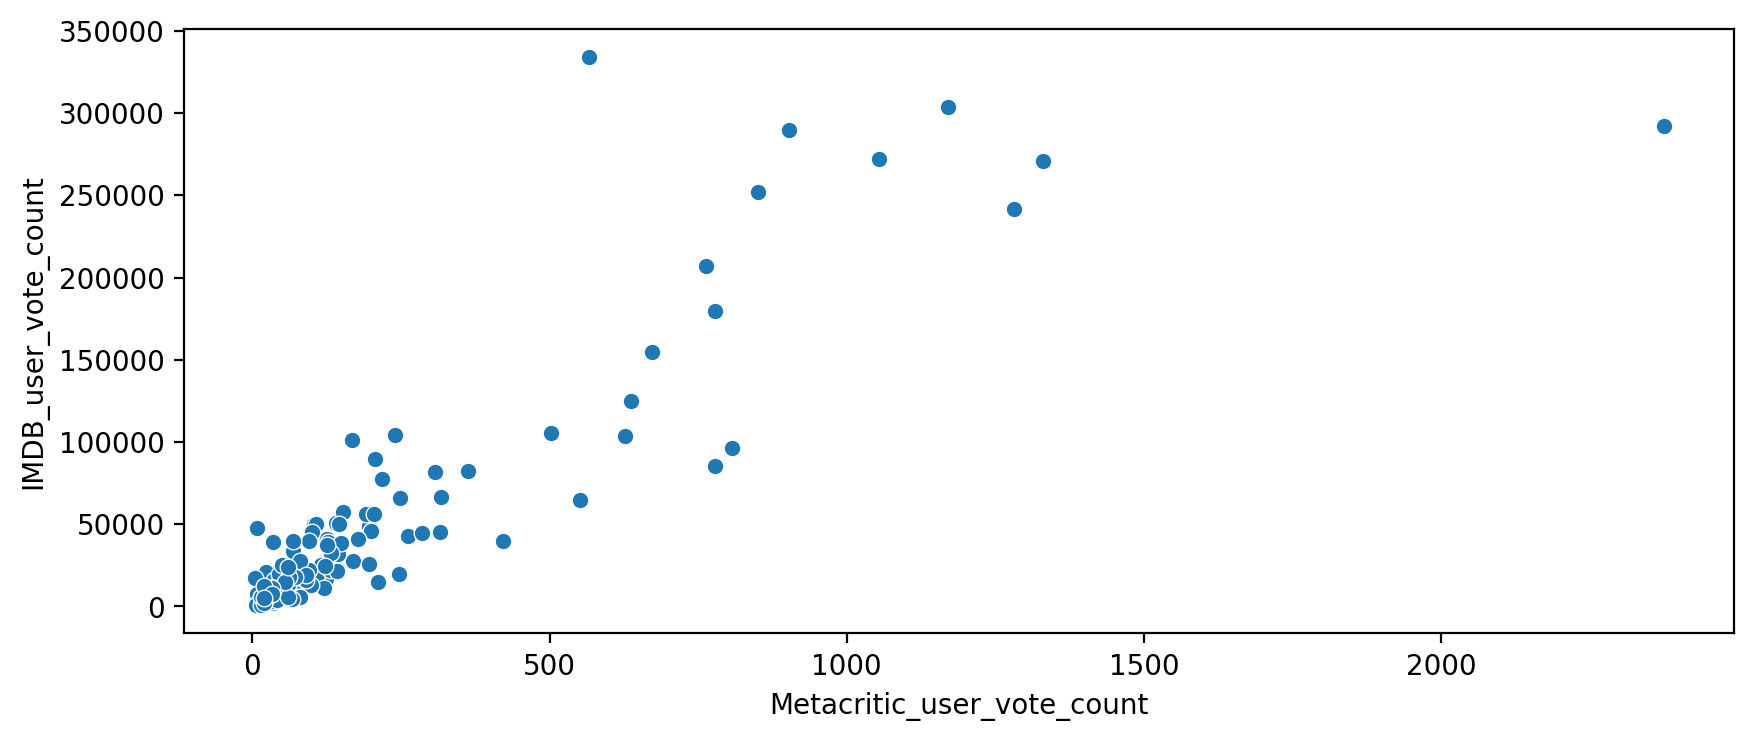

In [33]:
#the relationship between vote counts on MetaCritic versus vote counts on IMDB

plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='Metacritic_user_vote_count',y='IMDB_user_vote_count',data= all_sites)

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings.**

---

In [34]:
#highest IMDB user vote count
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [35]:
#highest Metacritic User Vote count
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


---

## Fandago Scores vs. All Sites

**Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.**

In [36]:
#Merging the two data frames

df=pd.merge(fandango,all_sites,how='inner',on='FILM')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [38]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


----

### Normalize columns to Fandango STARS and RATINGS 0-5 

**Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.**



In [39]:

df['RT_Norm']=df['RottenTomatoes'].apply(lambda x:x/20).round(1)
df['RTU_Norm']=df['RottenTomatoes_User'].apply(lambda x:x/20).round(1)

In [40]:
df['MT_Norm']=df['Metacritic'].apply(lambda x:x/20).round(1)
df['MTU_Norm']=df['Metacritic_User'].apply(lambda x:x/2).round(1)

In [41]:
df['IMDB_Norm']=df['IMDB'].apply(lambda x:x/2).round(1)
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [42]:
#created a norm_scores DataFrame that only contains the normalizes ratings.
#Include both STARS and RATING from the original Fandango table

In [43]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','MT_Norm','MTU_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3



### Comparing Distribution of Scores Across Sites


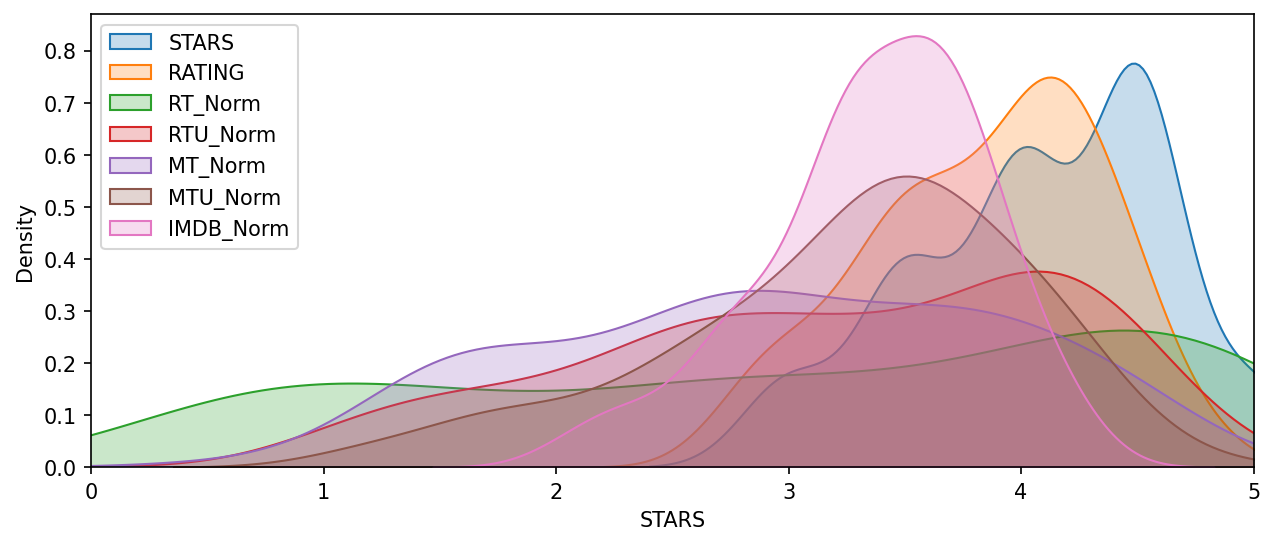

In [44]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(x='STARS',data=norm_scores,fill = True,label = 'STARS')
sns.kdeplot(x='RATING',data=norm_scores,fill = True,label = 'RATING')
sns.kdeplot(x='RT_Norm',data=norm_scores,fill = True,label = 'RT_Norm')
sns.kdeplot(x='RTU_Norm',data=norm_scores,fill = True,label = 'RTU_Norm')
sns.kdeplot(x='MT_Norm',data=norm_scores,fill = True,label = 'MT_Norm')
sns.kdeplot(x='MTU_Norm',data=norm_scores,fill = True,label = 'MTU_Norm')
sns.kdeplot(x='IMDB_Norm',data=norm_scores,fill = True,label = 'IMDB_Norm')
plt.xlim(0,5)
plt.legend( loc='upper left')

#RT = Rotten tomates
#MT = Metacritic
#U  = User

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**STARS and RATING belongs to fandango**

----

(0.0, 5.0)

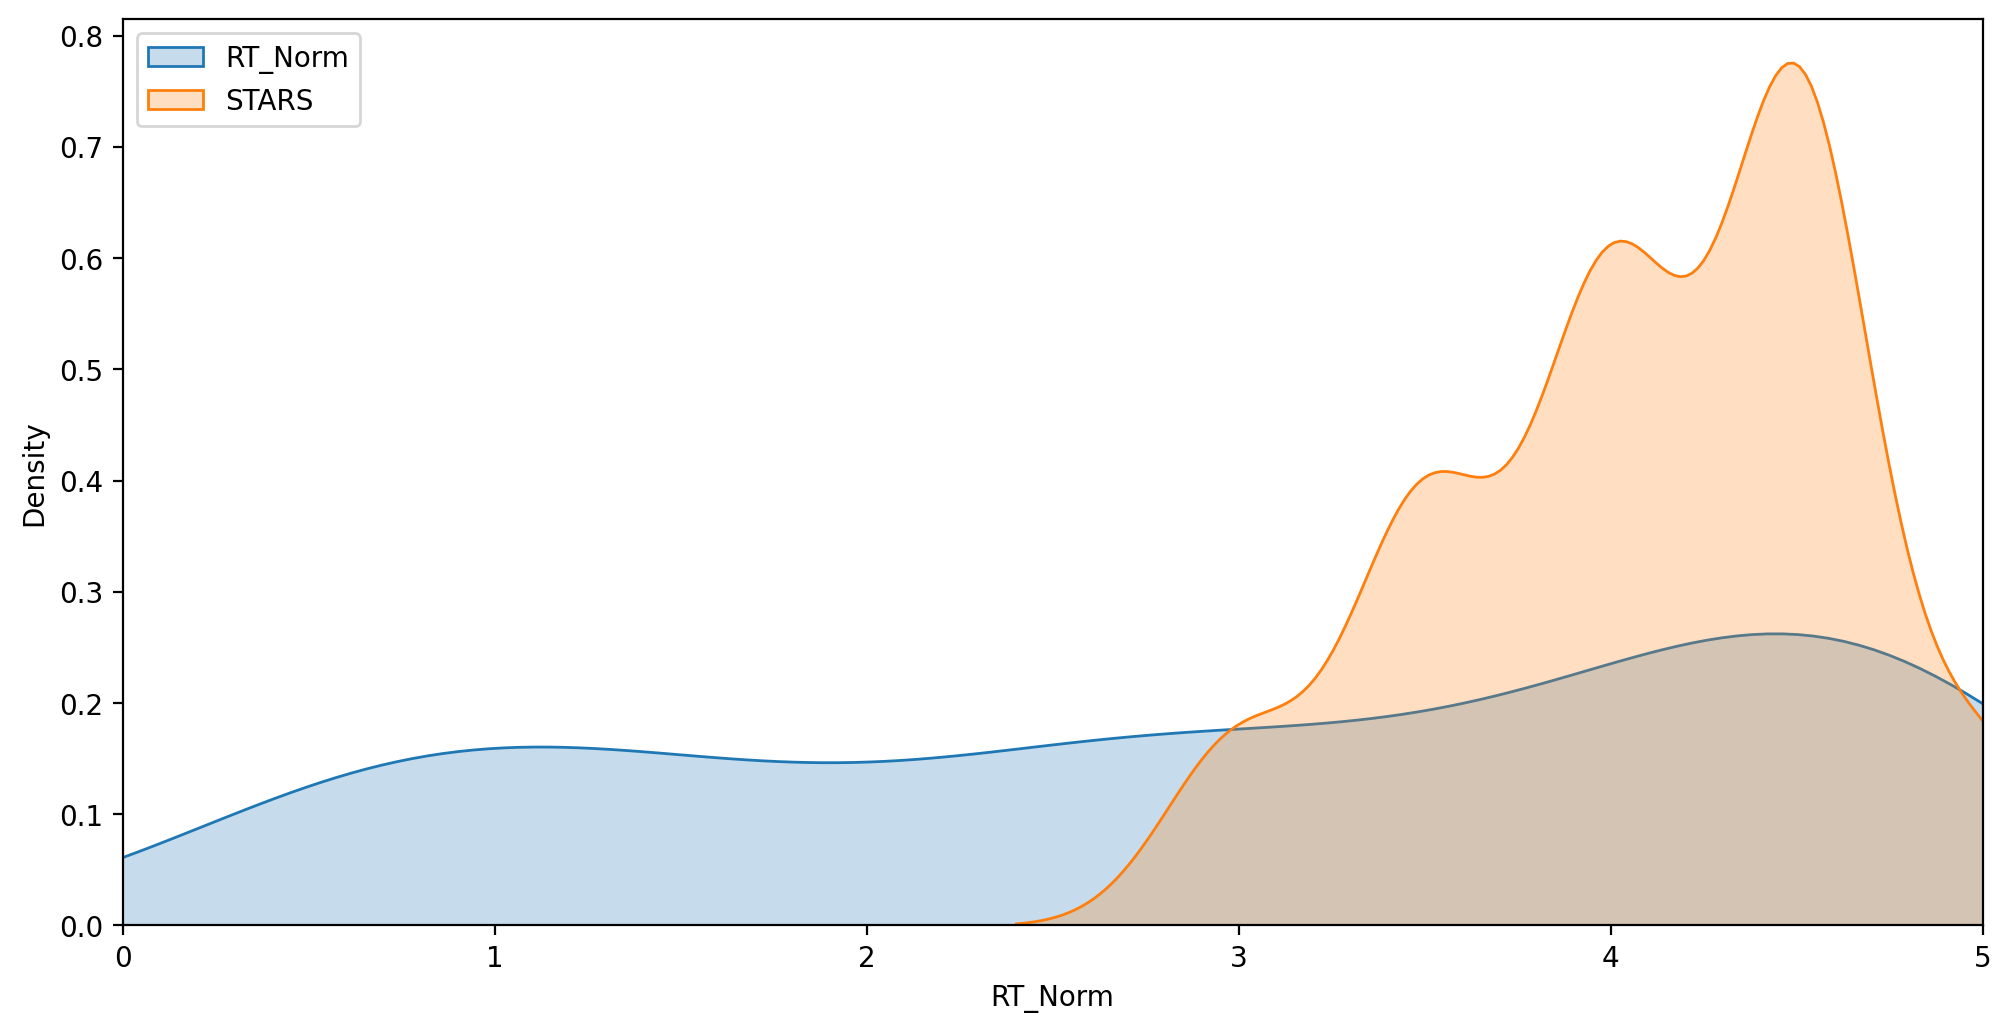

In [45]:
plt.figure(figsize=(12,6),dpi=200)
sns.kdeplot(x='RT_Norm',data=norm_scores,fill = True,label = 'RT_Norm')
sns.kdeplot(x='STARS',data=norm_scores,fill = True,label = 'STARS')
plt.legend( loc='upper left')
plt.xlim(0,5)

**Clearly fandango ratings are abnormaly higher than Rotten tomatoes**


---

<AxesSubplot:ylabel='Count'>

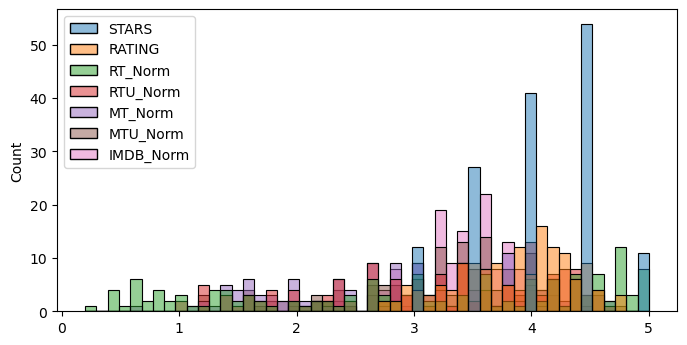

In [46]:
# Histogram to compare all normalized scores 

plt.figure(figsize=(8,4),dpi=100)
sns.histplot(norm_scores,bins=50)


### How are the worst movies rated across all platforms?



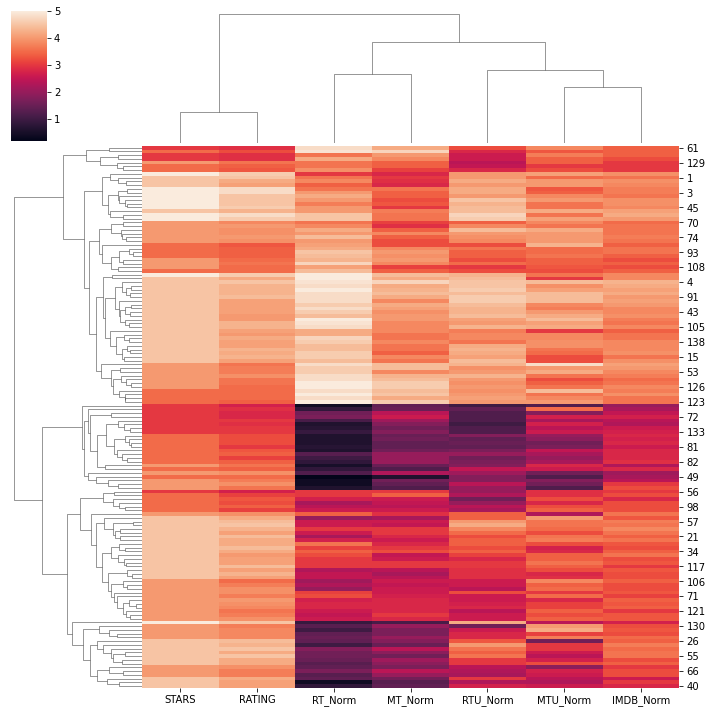

In [47]:
#clustermap visualization of all normalized scores
sns.clustermap(norm_scores)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.**

**Let's now display the top 10 lowest rated movies Based off the Rotten Tomatoes Critic Ratings. We will compare the normalized scores across all platforms for these movies.**

In [48]:
norm_film = df[['STARS','RATING','RT_Norm','RTU_Norm','MT_Norm','MTU_Norm','IMDB_Norm','FILM']]
norm_film.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


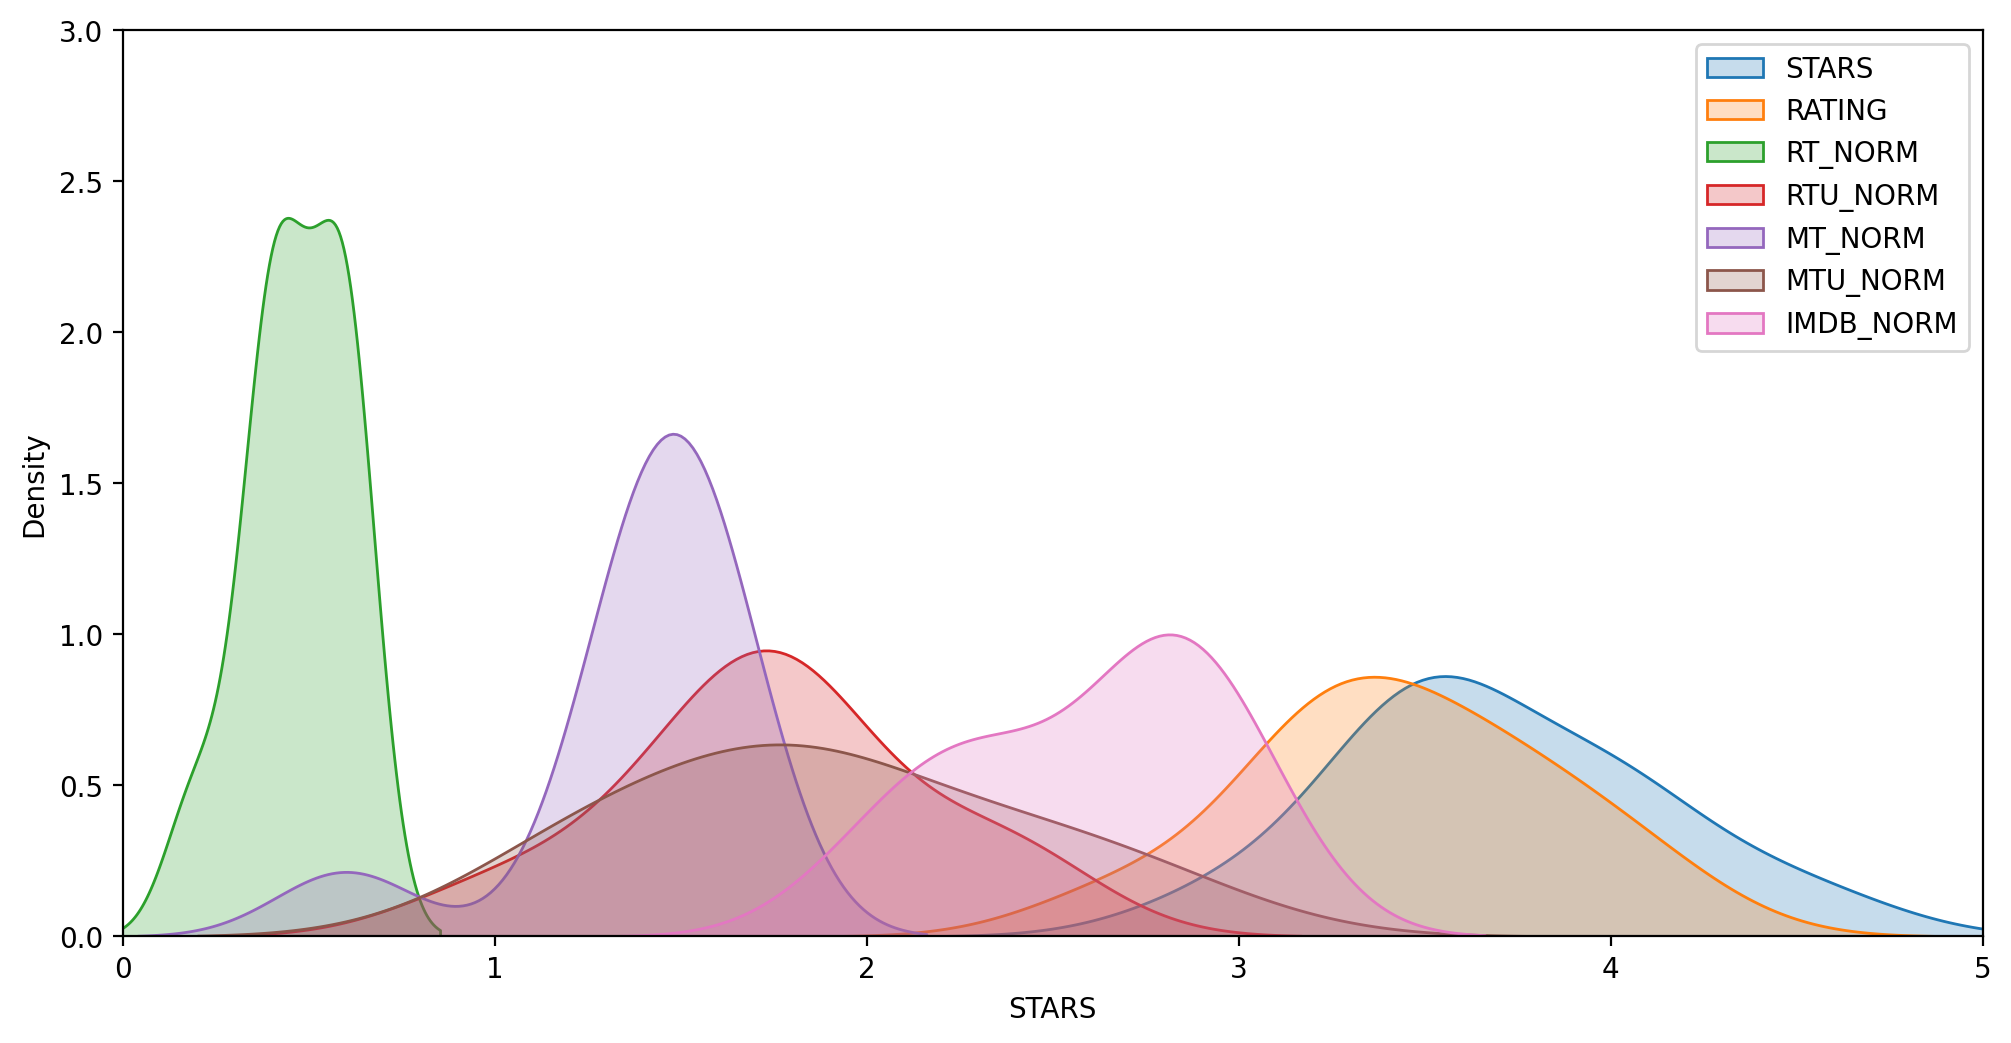

In [49]:
#the distribution of ratings across all sites for the top 10 worst movies



plt.figure(figsize=(12,6),dpi=200)
sns.kdeplot(norm_film.nsmallest(10,'RT_Norm')['STARS'],fill=True,label='STARS')
sns.kdeplot(norm_film.nsmallest(10,'RT_Norm')['RATING'],fill=True,label='RATING')
sns.kdeplot(norm_film.nsmallest(10,'RT_Norm')['RT_Norm'],fill=True,label='RT_NORM')
sns.kdeplot(norm_film.nsmallest(10,'RT_Norm')['RTU_Norm'],fill=True,label='RTU_NORM')
sns.kdeplot(norm_film.nsmallest(10,'RT_Norm')['MT_Norm'],fill=True,label='MT_NORM')
sns.kdeplot(norm_film.nsmallest(10,'RT_Norm')['MTU_Norm'],fill=True,label='MTU_NORM')
sns.kdeplot(norm_film.nsmallest(10,'RT_Norm')['IMDB_Norm'],fill=True,label='IMDB_NORM')
plt.xlim(0,5)
plt.ylim(0,3)
plt.legend()


**we can clearly observe that the movies with rating between 0 and 1 in Rotten tomatoes are Rated around 3-5 in Fandango**




# **Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad!**

----